<a href="https://colab.research.google.com/github/ruslanraupoff/mai-416854/blob/master/spa.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Let’s take the normal (gaussian) distribution as an example. The probability density function (pdf) is:

![img](https://wikimedia.org/api/rest_v1/media/math/render/svg/8d08696e5412b294b2a8bf97bd97dd2af6cd7c08)

Basically, if we have a range of x’s, a mean (μ) and a standard deviation (σ), we can pass them onto this formula and get corresponding y values, which we can then plot using the standard matplotlib plot() function:

In [7]:
%matplotlib inline

import numpy as np
import scipy.stats as ss
import matplotlib.pyplot as plt

plt.style.use('seaborn') # pretty matplotlib plots
plt.rcParams['figure.figsize'] = (12, 8)

Let’s get our x values, determine a mean and a standard deviation, and setup the formula for the normal pdf:

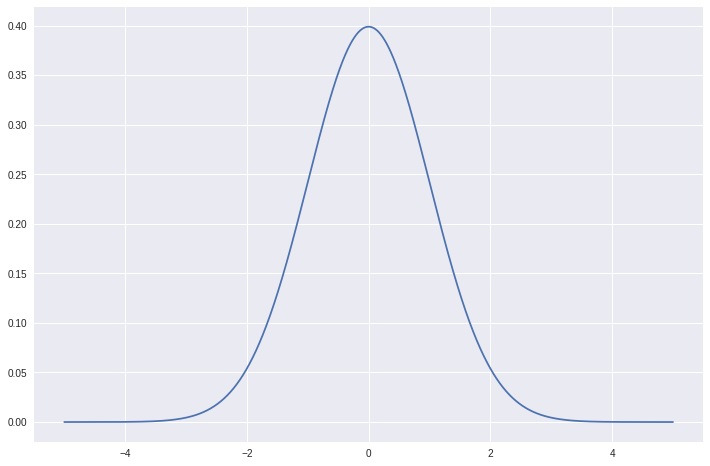

In [5]:
x = np.linspace(-5, 5, 5000)
mu = 0
sigma = 1

y = (1 / (np.sqrt(2 * np.pi * np.power(sigma, 2)))) *  (np.power(np.e, -(np.power((x - mu), 2) / (2 * np.power(sigma, 2)))))
plt.plot(x, y)
plt.show()

Which is fine and dandy, but it gets quite cumbersome to write those formulas from scratch using numpy and scipy functions for every distribution we want. Some are even really hard to implement, take for example the cumulative distribution function (cdf) for the standard normal distribution:

![img](https://wikimedia.org/api/rest_v1/media/math/render/svg/8fd88383d7c6a89c53685e52df2097a0c84f4bef)

Fortunately for us, the people at scipy provided nearly every kind of distribution function in the scipy.stats package. Using that, we can achieve the same result as above in a cleaner, less error-prone code. We can even plot the cdf on top of that:



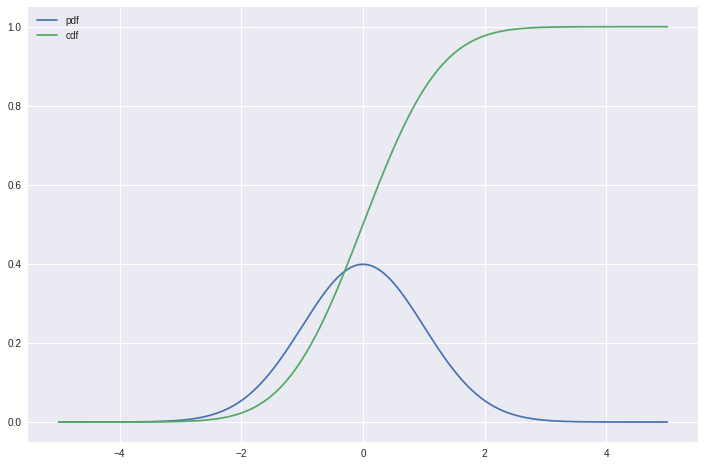

In [8]:
x = np.linspace(-5, 5, 5000)
mu = 0
sigma = 1

y_pdf = ss.norm.pdf(x, mu, sigma) # the normal pdf
y_cdf = ss.norm.cdf(x, mu, sigma) # the normal cdf

plt.plot(x, y_pdf, label='pdf')
plt.plot(x, y_cdf, label='cdf')
plt.legend()
plt.show()

For reuse, it may be a good idea to put these into a function:

In [9]:
def plot_normal(x_range, mu=0, sigma=1, cdf=False, **kwargs):
    '''
    Plots the normal distribution function for a given x range
    If mu and sigma are not provided, standard normal is plotted
    If cdf=True cumulative distribution is plotted
    Passes any keyword arguments to matplotlib plot function
    '''
    x = x_range
    if cdf:
        y = ss.norm.cdf(x, mu, sigma)
    else:
        y = ss.norm.pdf(x, mu, sigma)
    plt.plot(x, y, **kwargs)


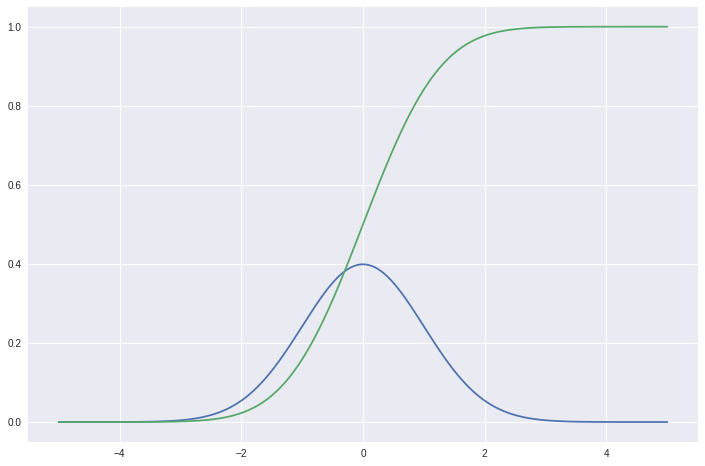

In [10]:
x = np.linspace(-5, 5, 5000)

plot_normal(x)
plot_normal(x, cdf=True)


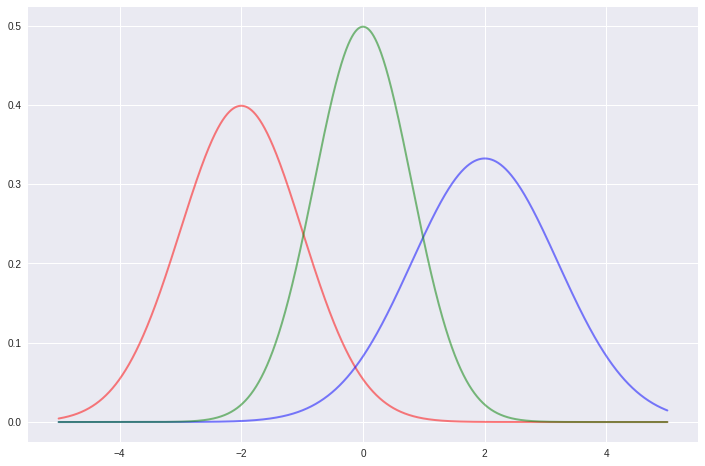

In [11]:
plot_normal(x, -2, 1, color='red', lw=2, ls='-', alpha=0.5)
plot_normal(x, 2, 1.2, color='blue', lw=2, ls='-', alpha=0.5)
plot_normal(x, 0, 0.8, color='green', lw=2, ls='-', alpha=0.5)

Given this knowledge, we can now define a function for plotting any kind of distribution. The important bit is to be careful about the parameters of the corresponding scipy.stats function (Some distributions require more than a mean and a standard deviation). You can check those parameters on the official docs for scipy.stats.

## The exponential distribution:



In [14]:
def plot_exponential(x_range, mu=0, sigma=1, cdf=False, **kwargs):
    '''
    Plots the exponential distribution function for a given x range
    If mu and sigma are not provided, standard exponential is plotted
    If cdf=True cumulative distribution is plotted
    Passes any keyword arguments to matplotlib plot function
    '''
    x = x_range
    if cdf:
        y = ss.expon.cdf(x, mu, sigma)
    else:
        y = ss.expon.pdf(x, mu, sigma)
    plt.plot(x, y, **kwargs)


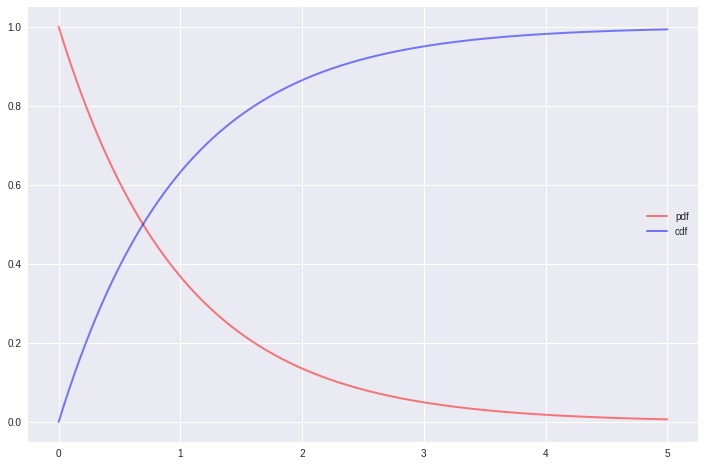

In [13]:
x = np.linspace(0, 5, 5000)

plot_exponential(x, 0, 1, color='red', lw=2, ls='-', alpha=0.5, label='pdf')
plot_exponential(x, 0, 1, cdf=True, color='blue', lw=2, ls='-', alpha=0.5, label='cdf')
plt.legend()
plt.show()

## The F distribution:

In [15]:

def plot_f(x_range, dfn, dfd, mu=0, sigma=1, cdf=False, **kwargs):
    '''
    Plots the f distribution function for a given x range, dfn and dfd
    If mu and sigma are not provided, standard f is plotted
    If cdf=True cumulative distribution is plotted
    Passes any keyword arguments to matplotlib plot function
    '''
    x = x_range
    if cdf:
        y = ss.f.cdf(x, dfn, dfd, mu, sigma)
    else:
        y = ss.f.pdf(x, dfn, dfd, mu, sigma)
    plt.plot(x, y, **kwargs)


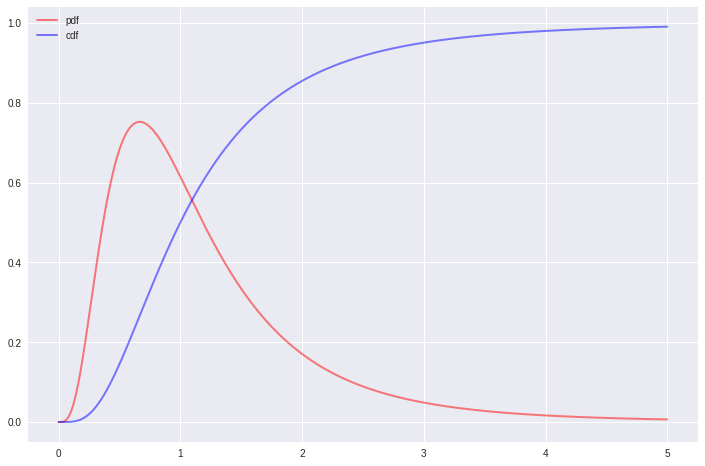

In [16]:
x = np.linspace(0.001, 5, 5000)

plot_f(x, 10, 10, 0, 1, color='red', lw=2, ls='-', alpha=0.5, label='pdf')
plot_f(x, 10, 10, 0, 1, cdf=True, color='blue', lw=2, ls='-', alpha=0.5, label='cdf')
plt.legend()
plt.show()

## The beta distribution:

In [17]:
def plot_beta(x_range, a, b, mu=0, sigma=1, cdf=False, **kwargs):
    '''
    Plots the f distribution function for a given x range, a and b
    If mu and sigma are not provided, standard beta is plotted
    If cdf=True cumulative distribution is plotted
    Passes any keyword arguments to matplotlib plot function
    '''
    x = x_range
    if cdf:
        y = ss.beta.cdf(x, a, b, mu, sigma)
    else:
        y = ss.beta.pdf(x, a, b, mu, sigma)
    plt.plot(x, y, **kwargs)


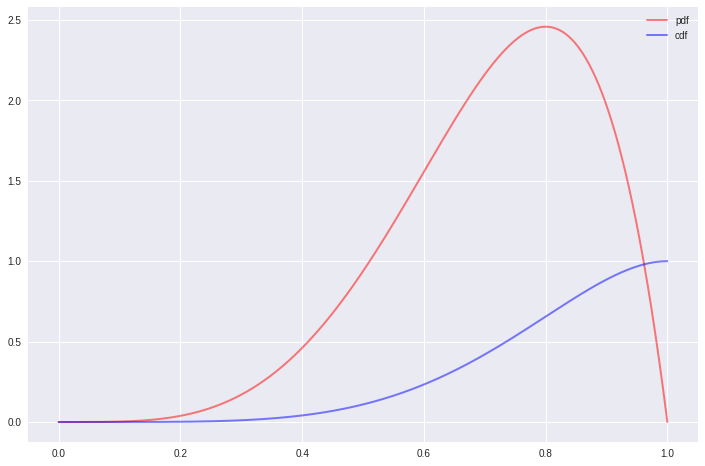

In [18]:
x = np.linspace(0, 1, 5000)

plot_beta(x, 5, 2, 0, 1, color='red', lw=2, ls='-', alpha=0.5, label='pdf')
plot_beta(x, 5, 2, 0, 1, cdf=True, color='blue', lw=2, ls='-', alpha=0.5, label='cdf')
plt.legend()
plt.show()